In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

count = 10000

P = [
    [0.13, 0.04, 0.19],
    [0.08, 0.15, 0.07],
    [0.11, 0.11, 0.12]]

sum_by_x = []
x = 0
for i in range(len(P[0])):
    for j in range(len(P)):
        x += P[j][i]
    sum_by_x.append(x)


sum_by_y = []
y = 0
for j in range(len(P)):
    for i in range(len(P[0])):
        y += P[j][i]
    sum_by_y.append(y)

print('    ', sum_by_x, end='')
for j in range(len(P)):
    print('\n', "%.2f" % sum_by_y[j], end='| ')
    for i in range(len(P[0])):
        print(P[j][i], end=' ')


def get_x_index(value):
    for i in range(len(sum_by_x)):
        if value < sum_by_x[i]:
            return i


def get_y_index_by_x(value, x_index):
    y = 0
    for i in range(len(P)):
        y += P[i][x_index]
        if value < y:
            return i

     [0.32, 0.62, 1.0]
 0.36| 0.13 0.04 0.19 
 0.66| 0.08 0.15 0.07 
 1.00| 0.11 0.11 0.12 

In [29]:
rand_x = np.random.randint(0, 999, count) / 1000
rand_y = np.random.randint(0, 999, count) / 1000
result = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]]
xs = []
ys = []
for i in range(count):
    x_index = get_x_index(rand_x[i])
    xs.append(x_index)
    sum_one_line = 0
    for j in range(len(P)):
        sum_one_line += P[j][x_index]
    y_variant = rand_y[i] * sum_one_line
    y_index = get_y_index_by_x(y_variant, x_index)
    ys.append(y_index)
    result[y_index][x_index] += 1
    # x_index и y_index are x and y probability indices

Heatmaps are similar considering 10000 scale, which is equal to numbers count


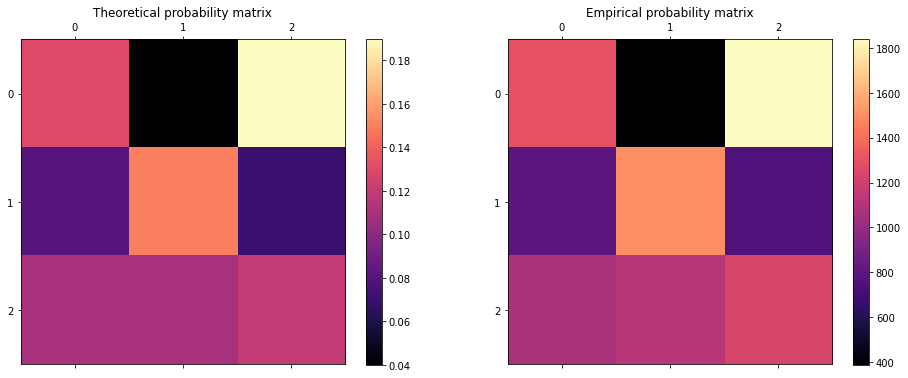

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.set_title('Theoretical probability matrix')
im1 = ax1.matshow(P, cmap='magma', interpolation='nearest')

ax2.set_title('Empirical probability matrix')
im2 = ax2.matshow(result, cmap='magma', interpolation='nearest')

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
print("Heatmaps are similar considering 10000 scale, which is equal to numbers count")

X and Y random value components histograms


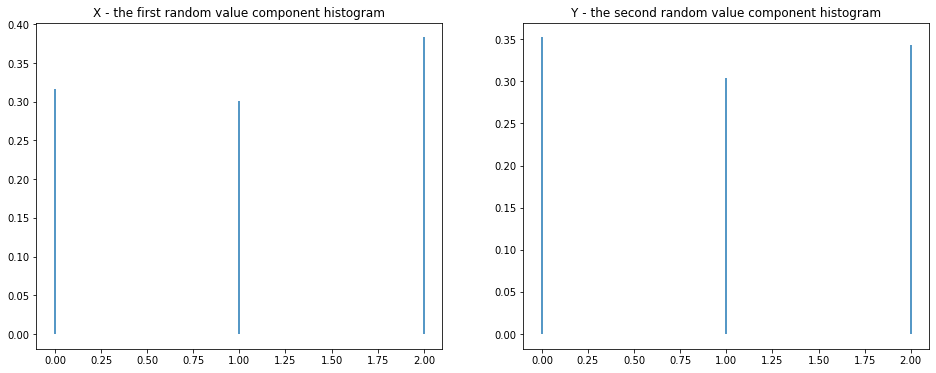

In [31]:
x_unique_values, x_unique_counts = np.unique(xs, return_counts=True)
y_unique_values, y_unique_counts = np.unique(ys, return_counts=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.set_title('X - the first random value component histogram')
ax1.vlines(x_unique_values, 0, x_unique_counts / count)

ax2.set_title('Y - the second random value component histogram')
ax2.vlines(y_unique_values, 0, y_unique_counts / count)
print("X and Y random value components histograms")

In [32]:
row_sums = np.sum(P, axis=1)
column_sums = np.sum(P, axis=0)
theor_variance = np.sum(row_sums), np.sum(column_sums)
print(theor_variance)

emp_variance = np.mean(xs), np.mean(ys)
print(emp_variance)

(0.9999999999999999, 1.0)
(1.0667, 0.9913)


In [33]:
result_sum_x = np.sum(result, axis=0) / count
result_sum_y = np.sum(result, axis=1) / count

def get_expectation(vector):
    return np.sum(vector * np.array([0.0, 1.0, 2.0]))

theoretical_e_x = get_expectation(np.sum(P, axis=0))
theoretical_e_y = get_expectation(np.sum(P, axis=1))
print("E[X] of theoretical P:", theoretical_e_x)
print("E[Y] of theoretical P:", theoretical_e_y)

empirical_e_x = get_expectation(result_sum_x)
empirical_e_y = get_expectation(result_sum_y)
print("E[X] of empirical:", empirical_e_x)
print("E[Y] of empirical:", empirical_e_y)
print("Mathematical theoretical and empirical expectations are similar considering 10000 scale, which is equal to numbers count")

E[X] of theoretical P: 1.06
E[Y] of theoretical P: 0.98
E[X] of empirical: 1.0667
E[Y] of empirical: 0.9913
Mathematical theoretical and empirical expectations are similar considering 10000 scale, which is equal to numbers count


In [34]:
def get_dispersion(values, expectation_by_values, probalilities):
    values_sum = 0
    for j in range(len(values)):
        values_sum += (values[j] - expectation_by_values) ** 2 * probalilities[j]
    return values_sum / len(values)

theoretical_dispersion_x = get_dispersion([0, 1, 2], theoretical_e_x, np.sum(P, axis=0))
theoretical_dispersion_y = get_dispersion([0, 1, 2], theoretical_e_y, np.sum(P, axis=1))
print("Dispersion[X] of theoretical matrix P:", theoretical_dispersion_x)
print("Dispersion[Y] of theoretical matrix P:", theoretical_dispersion_y)

empirical_dispersion_x = get_dispersion([0, 1, 2], empirical_e_x, result_sum_x)
empirical_dispersion_y = get_dispersion([0, 1, 2], empirical_e_y, result_sum_y)
print("Dispersion[X] of empirical matrix result:", empirical_dispersion_x)
print("Dispersion[Y] of empirical matrix result:", empirical_dispersion_y)
print("Dispersions of theoretical and empirical data are similar")

Dispersion[X] of theoretical matrix P: 0.23213333333333333
Dispersion[Y] of theoretical matrix P: 0.23319999999999996
Dispersion[X] of empirical matrix result: 0.23161703666666666
Dispersion[Y] of empirical matrix result: 0.23180810333333338
Dispersions of theoretical and empirical data are similar


In [35]:
def correlation_coefficient(x, y):
    xy = [x_i * y_i for x_i, y_i in zip(x, y)]
    m_x = get_expectation(x)
    m_y = get_expectation(y)
    m_xy = get_expectation(xy)

    r = (m_xy - m_x * m_y) / math.sqrt(get_dispersion([0, 1, 2], m_x, x) * get_dispersion([0, 1, 2], m_y, y))
    return r

theoretical_r = correlation_coefficient(np.sum(P, axis=0), np.sum(P, axis=1))
empirical_r = correlation_coefficient(result_sum_x, result_sum_y)
print("Correlation coefficient of theoretical matrix P:", theoretical_r)
print("Correlation coefficient of empirical matrix result:", empirical_r)
print("Correlation coefficients of theoretical and empirical data are similar")

Correlation coefficient of theoretical matrix P: -2.9673430394743887
Correlation coefficient of empirical matrix result: -3.0331208174583724
Correlation coefficients of theoretical and empirical data are similar


In [36]:
def get_conf_interval(values):
    z = 1.96
    n = len(values)
    exp = get_expectation(values)
    disp = get_dispersion([0, 1, 2], exp, values)
    left = exp - z * disp / n ** 0.5
    right = exp + z * disp / n ** 0.5
    return left, right

print("Confidence interval for E[X] from theoretical matrix P:", get_conf_interval(np.sum(P, axis=0)))
print("Confidence interval for E[Y] from theoretical matrix P:", get_conf_interval(np.sum(P, axis=1)))

print("Confidence interval for E[X] from empirical matrix result:", get_conf_interval(result_sum_x))
print("Confidence interval for E[Y] from empirical matrix result:", get_conf_interval(result_sum_y))

Confidence interval for E[X] from theoretical matrix P: (0.7973164047237452, 1.322683595276255)
Confidence interval for E[Y] from theoretical matrix P: (0.7161093577609594, 1.2438906422390406)
Confidence interval for E[X] from empirical matrix result: (0.8046006494019293, 1.3287993505980706)
Confidence interval for E[Y] from empirical matrix result: (0.7289844371147203, 1.2536155628852796)


In [37]:
chi2, prob, df, expected = st.chi2_contingency(P)
print("Chi-square of theoretical matrix P:", chi2)
chi2, prob, df, expected = st.chi2_contingency(result)
print("Chi-square of empirical matrix result:", chi2 / count)

Chi-square of theoretical matrix P: 0.12635001003325308
Chi-square of empirical matrix result: 0.1190346328111353
